In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import numpy as np

sns.reset_defaults()
sns.set_theme(rc={'figure.dpi': 72, 'savefig.dpi': 300,
              'figure.autolayout': True})
sns.set_style('ticks')
sns.set_context('paper')

draw_ops = {
    'font_size': 14,
    'node_size': 3 * 300,
    'with_labels': True,
    'font_weight': 'bold',
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
}

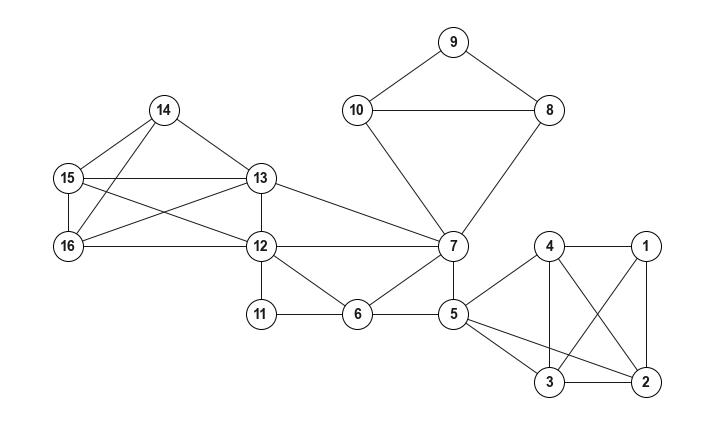

In [7]:
# Create the input graph

adj = {
    1: (2, 3, 4,),
    2: (1, 3, 4, 5,),
    3: (1, 2, 4, 5,),
    4: (1, 2, 3, 5,),
    5: (2, 3, 4, 6, 7,),
    6: (5, 7, 11, 12,),
    7: (5, 6, 8, 10, 12, 13,),
    8: (7, 9, 10,),
    9: (8, 10,),
    10: (7, 8, 9,),
    11: (6, 12,),
    12: (6, 7, 11, 13, 15, 16,),
    13: (7, 12, 14, 15, 16,),
    14: (13, 15, 16,),
    15: (12, 13, 14, 16,),
    16: (12, 13, 14, 15,),
}

pos = {
    1: (6, 0),
    2: (6, -2),
    3: (5, -2),
    4: (5, 0),
    5: (4, -1),
    6: (3, -1),
    7: (4, 0),
    8: (5, 2),
    9: (4, 3),
    10: (3, 2),
    11: (2, -1),
    12: (2, 0),
    13: (2, 1),
    14: (1, 2),
    15: (0, 1),
    16: (0, 0),
}

G = nx.Graph(adj)

fig, ax = plt.subplots(figsize=(10, 6))
nx.draw(G, ax=ax, **draw_ops, pos=pos)
plt.axis("off")
fig.savefig('q1_b-1.png')
plt.show()

In [8]:
# Find maximal cliques
mcliqes = nx.find_cliques_recursive(G)
mcliqes = list(mcliqes)
print(mcliqes)

[[1, 2, 3, 4], [2, 5, 3, 4], [7, 8, 10], [7, 13, 12], [7, 6, 12], [7, 6, 5], [9, 8, 10], [11, 12, 6], [14, 16, 13, 15], [15, 16, 12, 13]]


In [9]:
# Calculate the clique overlap matrix
co_matrix = np.zeros((len(mcliqes), len(mcliqes)), dtype=int)
for i, mci in enumerate(mcliqes):
    for j, mcj in enumerate(mcliqes):
        co_matrix[i, j] = len(set(mci).intersection(set(mcj)))
print(co_matrix)

[[4 3 0 0 0 0 0 0 0 0]
 [3 4 0 0 0 1 0 0 0 0]
 [0 0 3 1 1 1 2 0 0 0]
 [0 0 1 3 2 1 0 1 1 2]
 [0 0 1 2 3 2 0 2 0 1]
 [0 1 1 1 2 3 0 1 0 0]
 [0 0 2 0 0 0 3 0 0 0]
 [0 0 0 1 2 1 0 3 0 1]
 [0 0 0 1 0 0 0 0 4 3]
 [0 0 0 2 1 0 0 1 3 4]]


In [10]:
# Calculate the threshold matrix
K = 3
thr_matrix = co_matrix.copy()
for i in range(thr_matrix.shape[0]):
    for j in range(thr_matrix.shape[1]):
        if thr_matrix[i, j] < K - 1:
            thr_matrix[i, j] = 0
        else:
            thr_matrix[i, j] = 1
print(thr_matrix)

[[1 1 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0]
 [0 0 0 1 1 0 0 0 0 1]
 [0 0 0 1 1 1 0 1 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 1]
 [0 0 0 1 0 0 0 0 1 1]]


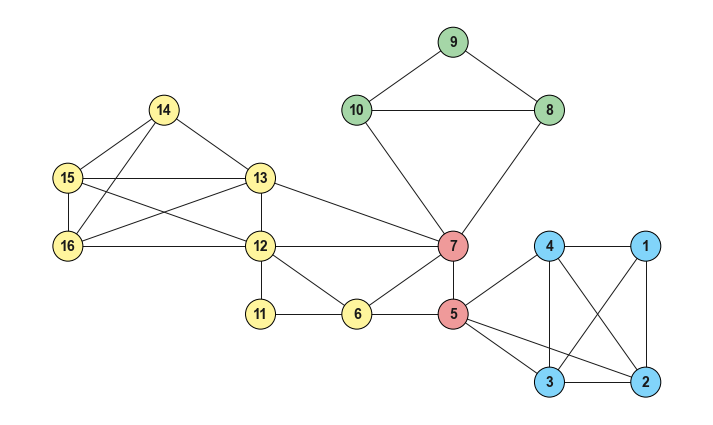

In [11]:
# Perform the Clique Percolation Method (CPM)

coms = nx.algorithms.community.k_clique_communities(G, 3)
coms = list(coms)

colors = ['white', "#EF9A9A", "#81D4FA", "#A5D6A7", "#FFF59D", "#B39DDB"]
comsi = {n: i for i, c in enumerate(coms, 2) for n in c}

# Set the color of nodes that don't belong to any community
for n in G:
    if n not in comsi:
        comsi[n] = 0

# Set the color of overlapping nodes
for c1 in coms:
    for c2 in coms:
        if c1 == c2:
            continue
        intersect = frozenset.intersection(c1, c2)
        for n in intersect:
            comsi[n] = 1

node_color = [colors[comsi[n]] for n in G]
dops = draw_ops.copy()
dops['node_color'] = node_color

fig, ax = plt.subplots(figsize=(10, 6))
nx.draw(G, ax=ax, **dops, pos=pos)
plt.axis("off")
fig.savefig('q1_b-2.png')
plt.show()